In [45]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata
from datetime import datetime
import requests
from pprint import pprint
import matplotlib.pyplot as plt


# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
#client = Socrata("data.colorado.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.colorado.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

client = Socrata("data.colorado.gov", "YKIL3gl973fnPvtdQYaGHnNxA", username="stefanie.huckleberry@gmail.com", 
                 password="d4V7hrdazyhsv79")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
result_list = client.get("4eit-nuxn", limit=200000, principalstate="CO")

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(result_list)

new_results_df = results_df.drop(columns={'mailingaddress1', 'mailingaddress2', 'mailingcity', 'mailingstate', 'mailingzipcode',
                                          'mailingcountry', 'agentfirstname', 'agentmiddlename', 'agentlastname',
                                          'agentsuffix', 'agentorganizationname', 'agentprincipaladdress1', 'agentprincipaladdress2',
                                          'agentprincipalcity', 'agentprincipalstate', 'agentprincipalzipcode', 
                                          'agentprincipalcountry', 'agentmailingaddress1', 'agentmailingaddress2', 'agentmailingcity',
                                          'agentmailingstate', 'agentmailingzipcode', 'agentmailingcountry'})





In [23]:
new_results_df['entityformdate'] = pd.to_datetime(new_results_df['entityformdate'], format='%Y/%m/%d')

new_results_df.head()




,entityformdate,entityid,entityname,entitystatus,entitytype,jurisdictonofformation,principaladdress1,principaladdress2,principalcity,principalcountry,principalstate,principalzipcode
0,1955-03-07,19871128232,MOUNTAIN STATES PIPE & SUPPLY CO.,Good Standing,Corporation,CO,111 W LAS VEGAS ST,NaN,Colorado Springs,US,CO,80903
1,1969-05-21,19871208746,UNITY OF BOULDER,Good Standing,Nonprofit Corporation,CO,2855 FOLSOM,NaN,Boulder,US,CO,80304
2,2017-01-05,20171016204,"KAT Photography, LLC, Dissolved June 15, 2018",Voluntarily Dissolved,Limited Liability Company,CO,2121 Bonfoy Ave,NaN,Colorado Springs,US,CO,80909
3,1979-02-13,19871364688,"T. S. T., INC.",Good Standing,Corporation,CO,47762 Hwy 96 E,NaN,Avondale,US,CO,81022
4,1988-12-15,19881105940,"THE FOURTEENTH EAST ASSOCIATION, INC.",Good Standing,Nonprofit Corporation,CO,807 E 14th Ave,NaN,Denver,US,CO,80218


In [24]:
mask = (new_results_df['entityformdate'] > '2012-12-31')

formed_after_df = new_results_df.loc[mask]


#rename the principaladdress1 column so that we can attempt a merge on it

formed_after_df = formed_after_df.rename(columns={'principaladdress1' : 'Street'})
formed_after_df.head()

,entityformdate,entityid,entityname,entitystatus,entitytype,jurisdictonofformation,Street,principaladdress2,principalcity,principalcountry,principalstate,principalzipcode
2,2017-01-05,20171016204,"KAT Photography, LLC, Dissolved June 15, 2018",Voluntarily Dissolved,Limited Liability Company,CO,2121 Bonfoy Ave,NaN,Colorado Springs,US,CO,80909
43,2017-01-23,20171056333,Pro Athletes Outreach,Good Standing,Nonprofit Corporation,CO,640 Plaza Drive,Suite 110,Highlands Ranch,US,CO,80129
66,2017-01-31,20171077785,Mesa Vista Storage,Good Standing,Limited Liability Company,CO,235 31 3/10 Rd,NaN,Grand Junction,US,CO,81503
112,2013-02-08,20131090821,"Strategic Kids, LLC",Good Standing,Limited Liability Company,CO,7200 E Dry Creek Rd.,Suite B103,Centennial,US,CO,80112
113,2013-02-18,20131103916,"KSBar, Inc.",Good Standing,Corporation,CO,4616 S Coors Way,NaN,Morrison,US,CO,80465


In [25]:
#read in the marijuana businesses from csv

mj_stores_df = pd.read_csv('CO Recreational Marijuana Stores.csv')
mj_stores_df.head()

,Licensee,DBA,License #,Street,City,Zip
0,10185 RIDGE LLC,EVERBLOOM,402R-00763,10185 West 49th Avenue,Wheat Ridge,80033
1,1-11 LLC,1:11,402R-00581,17034 Highway 17,Moffat,81143
2,1617 WAZEE STREET LLC,LODO WELLNESS CENTER,402R-00081,"1617 Wazee Street, Unit B",Denver,80202
3,2760 HAMPDEN INC,THE FIRE PLACE,402R-00757,2800 West Hampden Avenue,Sheridan,80110
4,3B FEDERAL1 LLC,BUDDY BOY,402R-00664,155 North Federal Boulevard,Denver,80219


In [31]:
mj_stores_df.columns

Index(['Licensee', 'DBA', 'License #', 'Street', 'City ', 'Zip'], dtype='object')

In [26]:
merged_df = pd.merge(formed_after_df, mj_stores_df, on='Street')
merged_df.head()

,entityformdate,entityid,entityname,entitystatus,entitytype,jurisdictonofformation,Street,principaladdress2,principalcity,principalcountry,principalstate,principalzipcode,Licensee,DBA,License #,City,Zip
0,2015-05-15,20151324422,Trill Evolutions LLC,Good Standing,Limited Liability Company,CO,5550 Joliet Street,NaN,Denver,US,CO,80239,TRILL EVOLUTIONS LLC,TRILL EVOLUTIONS,402R-00608,Denver,80239
1,2015-03-25,20151210333,Joliet 5550 LLC,Good Standing,Limited Liability Company,CO,5550 Joliet Street,NaN,Denver,US,CO,80239,TRILL EVOLUTIONS LLC,TRILL EVOLUTIONS,402R-00608,Denver,80239
2,2013-02-07,20131089840,"PM Property, LLC",Good Standing,Limited Liability Company,CO,127 Goldmine Drive,NaN,Pagosa Springs,US,CO,81147,JOE CAL ENTERPRISES INC,PAGOSA CRAFT,402R-00667,Pagosa Springs,81147
3,2013-02-07,20131089850,"Pagosa Motorsports, Inc., Dissolved June 1, 2017",Voluntarily Dissolved,Corporation,CO,127 Goldmine Drive,NaN,Pagosa Springs,US,CO,81147,JOE CAL ENTERPRISES INC,PAGOSA CRAFT,402R-00667,Pagosa Springs,81147
4,2018-05-02,20181369540,"2515 7th Avenue, LLC",Good Standing,Limited Liability Company,CO,2515 7th Avenue,NaN,Garden City,US,CO,80631,CANNABIS CARE WELLNESS CENTERS LLC,SMOKEYS,402R-00169,Garden City,80631


In [27]:
crime_path = 'colorado_2015_crime/colorado_offense_type_by_agency_2013-2016.xls'
crime_df = pd.read_excel(crime_path)
crime_df.head()

,Type,City,Population,Total Offenses,Crimes Against Persons,Crimes Against Property,Crimes Against Society,Assault Offenses,Aggravated Assault,Simple Assault,...,Operating/ Promoting/ Assisting Gambling,Gambling Equipment Violations,Sports Tampering,Por- nography/ Obscene Material,Pros- titution Offenses,Pros- titution,Assisting or Promoting Prostitution,Purchasing Prostitution,Weapon Law Violations,Year
0,Cities,Aspen,6841.0,606.0,83.0,4450.0,723.0,481.0,90.0,353.0,...,0.0,0.0,0.0,3.0,4.0,3.0,1.0,0.0,70.0,2015
1,NaN,Ault,1623.0,28.0,10.0,503.0,20.0,82.0,4.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2015
2,NaN,Aurora,360237.0,25262.0,5474.0,4.0,14.0,8.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2015
3,NaN,Avon,6465.0,382.0,67.0,16892.0,2896.0,4651.0,849.0,3685.0,...,0.0,0.0,0.0,83.0,47.0,45.0,2.0,0.0,657.0,2015
4,NaN,Bayfield,2580.0,158.0,40.0,282.0,33.0,53.0,13.0,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2015


In [12]:
crime_df.columns

Index(['Type', 'City', 'Population', 'Total\nOffenses',
       'Crimes\nAgainst\nPersons', 'Crimes\nAgainst\nProperty',
       'Crimes\nAgainst\nSociety', 'Assault\nOffenses', 'Aggravated\nAssault',
       'Simple\nAssault', 'Intimidation', 'Homicide\nOffenses',
       'Murder and\nNonnegligent\nManslaughter', 'Negligent\nMan-\nslaughter',
       'Justifiable\nHomicide', 'Human\nTrafficking\nOffenses',
       'Commercial\nSex Acts', 'Involuntary\nServitude',
       'Kidnapping/\nAbduction', 'Sex\nOffenses', 'Rape', 'Sodomy',
       'Sexual\nAssault\nWith an\nObject', 'Fondling',
       'Sex\nOffenses,\nNon-\nforcible', 'Incest', 'Statutory\nRape', 'Arson',
       'Bribery', 'Burglary/\nBreaking &\nEntering',
       'Counter-\nfeiting/\nForgery',
       'Destruction/\nDamage/\nVandalism\nof Property', 'Embezzle-\nment',
       'Extortion/\nBlackmail', 'Fraud\nOffenses',
       'False\nPretenses/\nSwindle/\nConfidence\nGame',
       'Credit\nCard/\nAutomated\nTeller\nMachine\nFraud', 'Im

In [67]:
crime_sum = crime_df.loc[:,["City","Population","Total\nOffenses", "Crimes\nAgainst\nPersons","Crimes\nAgainst\nProperty","Crimes\nAgainst\nSociety", "Year"]]
crime_sum.head()

,City,Population,Total Offenses,Crimes Against Persons,Crimes Against Property,Crimes Against Society,Year
0,Aspen,6841.0,606.0,83.0,4450.0,723.0,2015
1,Ault,1623.0,28.0,10.0,503.0,20.0,2015
2,Aurora,360237.0,25262.0,5474.0,4.0,14.0,2015
3,Avon,6465.0,382.0,67.0,16892.0,2896.0,2015
4,Bayfield,2580.0,158.0,40.0,282.0,33.0,2015


In [68]:
mj_stores_df = mj_stores_df.rename(columns={"City ": "City"})
stores_sum = mj_stores_df.groupby("City").count()

In [69]:
city_store_crime = pd.merge(stores_sum, crime_sum, on="City", how="right")
city_store_crime["Crime Per Person"]=(city_store_crime["Total\nOffenses"]+city_store_crime["Crimes\nAgainst\nPersons"]+ city_store_crime["Crimes\nAgainst\nProperty"]+city_store_crime["Crimes\nAgainst\nSociety"])/city_store_crime["Population"]*100
clean_store_crime = city_store_crime.dropna(how="any")
clean_store_crime

,City,Licensee,DBA,License #,Street,Zip,Population,Total Offenses,Crimes Against Persons,Crimes Against Property,Crimes Against Society,Year,Crime Per Person
0,Aspen,7.0,7.0,7.0,7.0,7.0,6841.0,606.0,83.0,4450.0,723.0,2015,85.689227
1,Aspen,7.0,7.0,7.0,7.0,7.0,6926.0,588.0,53.0,514.0,21.0,2016,16.979498
2,Aspen,7.0,7.0,7.0,7.0,7.0,6744.0,511.0,54.0,428.0,29.0,2014,15.154211
3,Aspen,7.0,7.0,7.0,7.0,7.0,6685.0,601.0,83.0,501.0,17.0,2013,17.980553
4,Aurora,23.0,17.0,23.0,23.0,23.0,360237.0,25262.0,5474.0,4.0,14.0,2015,8.537157
5,Aurora,23.0,17.0,23.0,23.0,23.0,366477.0,27535.0,5964.0,18548.0,3023.0,2016,15.026864
6,Aurora,23.0,17.0,23.0,23.0,23.0,350948.0,23155.0,5081.0,15487.0,2587.0,2014,13.195687
7,Aurora,23.0,17.0,23.0,23.0,23.0,343484.0,23426.0,4611.0,16408.0,2407.0,2013,13.640228
8,Avon,4.0,4.0,4.0,4.0,4.0,6465.0,382.0,67.0,16892.0,2896.0,2015,313.023975
9,Avon,4.0,4.0,4.0,4.0,4.0,6532.0,331.0,58.0,255.0,18.0,2016,10.134721


In [59]:
# Minor Data Munging to Re-Format the Data Frames
re_format_crime = clean_store_crime.pivot_table("Crime Per Person", index=["Year"], columns=["City"])
# Preview that Reformatting worked
re_format_crime.head()

City,Aspen,Aurora,Avon,Basalt,Berthoud,Black Hawk,Boulder,Breckenridge,Carbondale,Central City,...,Salida,Sheridan,Silt,Silverthorne,Steamboat Springs,Telluride,Thornton,Trinidad,Walsenburg,Wheat Ridge
Year,,,,,,,,,,,,,,,,,,,,,
2013,17.980553,13.640228,9.564394,6.600314,4.778029,689.075630,10.392111,25.131349,6.041092,30.222222,...,14.178825,28.367347,9.762621,11.068605,10.159893,13.575443,10.908368,6.560018,20.000000,12.356713
2014,15.154211,13.195687,11.964480,8.084996,NaN,622.950820,8.344851,23.305538,NaN,34.252540,...,11.624496,28.938038,7.343124,9.723593,13.240878,11.865130,12.122804,14.239404,20.206897,12.612555
2015,85.689227,8.537157,313.023975,NaN,NaN,511.718750,5.976241,13.863447,NaN,NaN,...,5.559633,15.121303,29.240924,8.146453,7.746650,NaN,NaN,10.231395,39.461727,28.513812
2016,16.979498,15.026864,10.134721,3.846154,NaN,601.587302,9.986740,31.341782,6.866825,NaN,...,12.291516,28.071323,3.910068,NaN,12.515985,9.860312,12.872020,18.873592,35.667015,16.426137


ValueError: x and y must have same first dimension, but have shapes (4,) and (196,)

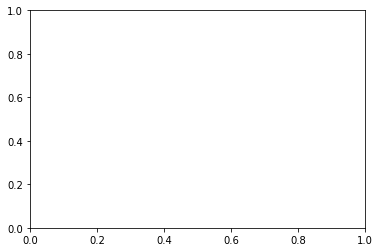

In [51]:
year = clean_store_crime["Year"]
city_list = clean_store_crime["City"]
crime_rate = clean_store_crime["Crime Rate"]



x_axis = np.arange(2012,2016,1)
city_list = clean_store_crime["City"]

fig, ax = plt.subplots()

ax.set_xlabel("Time(Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response to Treatment")


for d in drugs:
    plt.plot(x_axis, re_format_vol[d], yerr=re_format_se[d], alpha=1, label=d)
    
ax.legend(bbox_to_anchor =(1,1), fontsize="small",fancybox=True)
ax.grid()
# Save the Figure
plt.savefig("Tumor_response_to_treatment.png")
plt.show()